# Exploratory Data Analysis (EDA)
---


Retail dataset of a global superstore for 4 years.

### Objectives:


*   Explore features or characteristics to predict price of car

*   Analyze patterns and run descriptive statistical analysis

*   Perform Univariate and Bivariate analysis

*   Get Insights from the data



### **Import required libraries**

* numpy : Numerical and statistical analysis
* pandas : Making dataframe and handling data
* seaborn & matplotlib : Data Visualization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
sns.set(style="whitegrid")

Reading csv file of superstore data from github

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rajvalvi/Prepinsta-Winter-Internship-in-Data-Analytics/main/week-6/superstore_data.csv')

In [5]:
data.head() # View the first 5 values of the data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


* Take a overview of the data using data.info() method.
* When visualizing individual variables, it is important to first understand what type of variable you
are dealing with. This will help us find the right visualization method for that variable.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
data.drop(['Row ID'], axis=1, inplace=True) # There is no need of Row Id column so we removing it

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y', errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y', errors='coerce')
data['Shipping Days'] = (data['Ship Date'] - data['Order Date']).dt.days
data['Shipping Days']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Days, Length: 9800, dtype: int64

In [9]:
print("Number of duplicate values: ",data.duplicated().sum()) #counting duplicate values
data.drop_duplicates(inplace = True)   #removing duplicate values
print("After Removing duplicate values: ",data.duplicated().sum())

Number of duplicate values:  1
After Removing duplicate values:  0


* There is onlny one duplicate value and that also removed.
* So first to convert given data into usefull format.

In [10]:
data.rename(columns = str.lower, inplace=True)   #converting all column names to lower case
data.columns = data.columns.str.replace(" ","_") #replacing space between words with "_"
data.columns = data.columns.str.replace("-","_") #replacing "-" between words with "_"
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub_category', 'product_name',
       'sales', 'shipping_days'],
      dtype='object')

Did columns unifrom for easy to use.

In [11]:
data['sales']=data['sales'].round(2) # Rounding of extra points from the "Sales" columns.

In [12]:
data.describe()

,postal_code,sales,shipping_days
count,9788.000000,9799.000000,9799.000000
mean,55274.552922,230.763872,3.961118
std,32042.628986,626.683648,1.749703
min,1040.000000,0.440000,0.000000
25%,23223.000000,17.250000,3.000000
50%,58103.000000,54.480000,4.000000
75%,90008.000000,210.570000,5.000000
max,99301.000000,22638.480000,7.000000


In [13]:
data.shape #Shape of the data

(9799, 18)

**Handling NaN Values**

In [14]:
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
shipping_days     0
dtype: int64

* In the data we can see that only **"postal code"** column has **11 NaN** values.
* since the NaN values of "Postal Code" we don't going to replace that null values by performming any operation and they are only 11 so we are going to remove that null values


In [15]:
data.dropna(inplace=True)  #Removing NaN vales
print(data.shape)          #shape after removing NaN values

(9788, 18)


* After dropping NaN values, shape was changed from this (9800, 18) to this  (9789, 18)

**Final Data...**

 **After making clean and Uniform**

In [16]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,shipping_days
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,7


# Univariate Analysis:

In [17]:
data.order_id.nunique() #cheking how many unique order id's

4916

In [18]:
data['customer_name'].nunique() #Finding Total no of customer

793

There are **793** customers in given data.

In [19]:
print("There are ",data['product_id'].nunique(), " Products") #coutning number of products

There are  1860  Products


In [20]:
print("Number of Cities are:- ",data['city'].nunique()) #Counting Number of cities

Number of Cities are:-  529


## Shipping days Histogram

Text(0.5, 1.0, 'Shipping days')

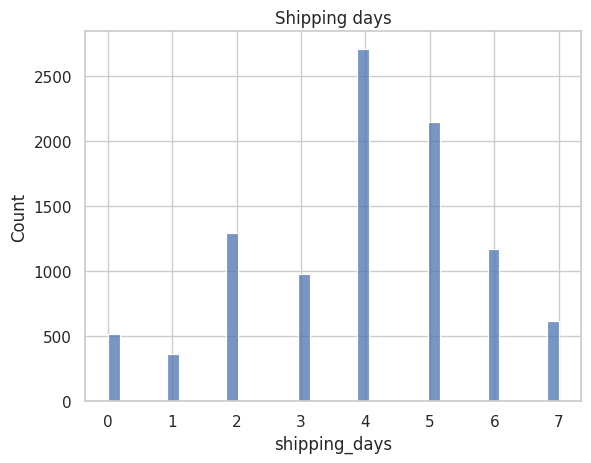

In [21]:
sns.histplot(x='shipping_days', data=data)
plt.title("Shipping days")


**Observation:**

Normally it tooks 4-5 days for Shipping

# Sales of Store

# Sales Histogram

Text(0.5, 1.0, 'Sales Histogram')

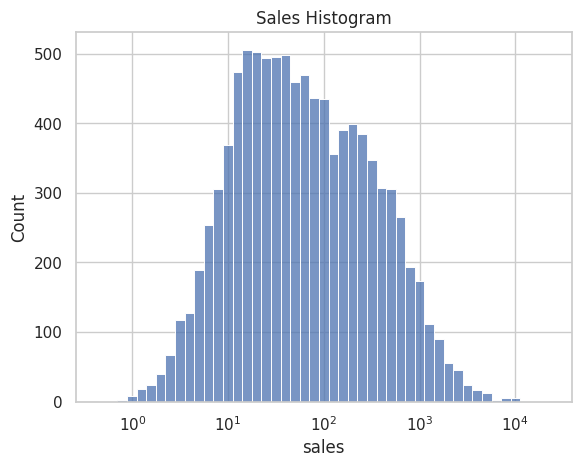

In [22]:
sns.histplot(x='sales', data=data, log_scale=True)
plt.title("Sales Histogram")


**Obseravtion**

Looking at the histogram we can say that sales are Noramally Distributed.

### Range the Data

In [23]:
sorted_dates = data['order_date'].sort_values()
print(sorted_dates.head(1))     #starting date
print(sorted_dates.tail(1))     #Ending date

7980   2015-01-03
Name: order_date, dtype: datetime64[ns]
5091   2018-12-30
Name: order_date, dtype: datetime64[ns]


As you can see here data is given between **2015-01-02** to **2018-12-30**

## Yearly sales

<ipython-input-24-62ec3b0a9adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  yearly_sales = sns.barplot(x='order_date', y='sales',data=date_sale_gr, palette="Set1")


Text(0, 0.5, 'Sales')

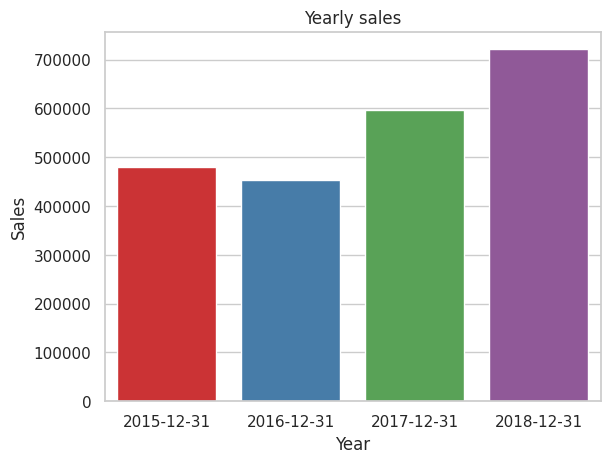

In [24]:
date_sale = data.loc[:,['order_date','sales']]      #selecting order_date and sales column
date_sale_gr = date_sale.groupby(pd.Grouper(key='order_date', freq='Y')).sum()
date_sale_gr.reset_index(inplace=True)

yearly_sales = sns.barplot(x='order_date', y='sales',data=date_sale_gr, palette="Set1")
plt.title("Yearly sales")
plt.xlabel("Year")
plt.ylabel("Sales")

**Observation :**

After Plotting this we can say that store make more growth in 2018 and 2019.

# Time Series Plot on Sales

Text(0.5, 0, 'Date')

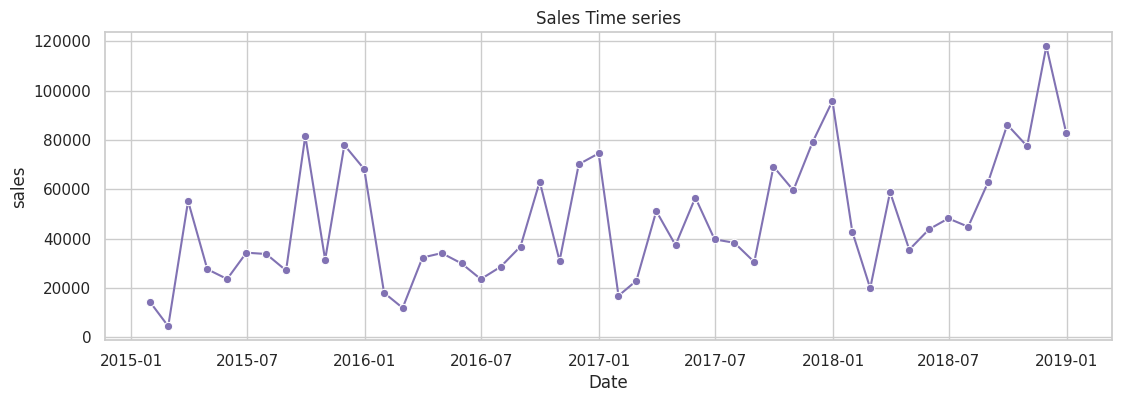

In [25]:
date_sale = data.loc[:,['order_date','sales']]      #selecting order_date and sales column
date_sale_gr = date_sale.groupby(pd.Grouper(key='order_date', freq='m')).sum()
date_sale_gr.reset_index(inplace=True)

plt.figure(figsize=(13,4))
sns.lineplot(x='order_date', y='sales', data=date_sale_gr, marker='o',color='m')
plt.title("Sales Time series")
plt.xlabel("Date")


**Observation :**

After ploting Time series we can't perfectly say that but in 2015,2016,2017 there is few growth and in 2018 and 2019 there is little more Growth

# Seasonal Decomposion

Text(0.5, 1.0, 'residual')

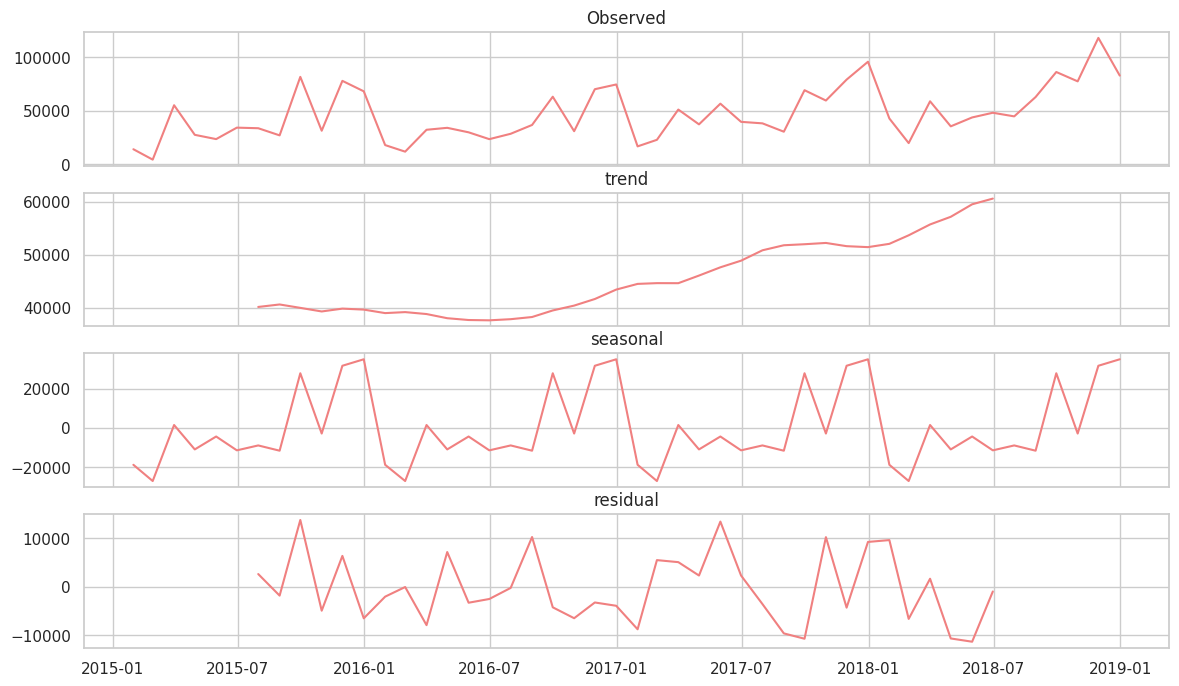

In [26]:
sd = seasonal_decompose(date_sale_gr['sales'], model='additive', period=12)

ig, axes = plt.subplots(4, 1, figsize=(14, 8), sharex=True)

axes[0].plot(date_sale_gr['order_date'], sd.observed, color="lightcoral")
axes[0].set_title('Observed')


axes[1].plot(date_sale_gr['order_date'], sd.trend, color="lightcoral")
axes[1].set_title('trend')


axes[2].plot(date_sale_gr['order_date'], sd.seasonal, color="lightcoral")
axes[2].set_title('seasonal')

axes[3].plot(date_sale_gr['order_date'], sd.resid, color="lightcoral")
axes[3].set_title('residual')



**Observation :**

After plotting seasonal Decomposition we can say that Store is making growth from openning

**Sales variation over time**

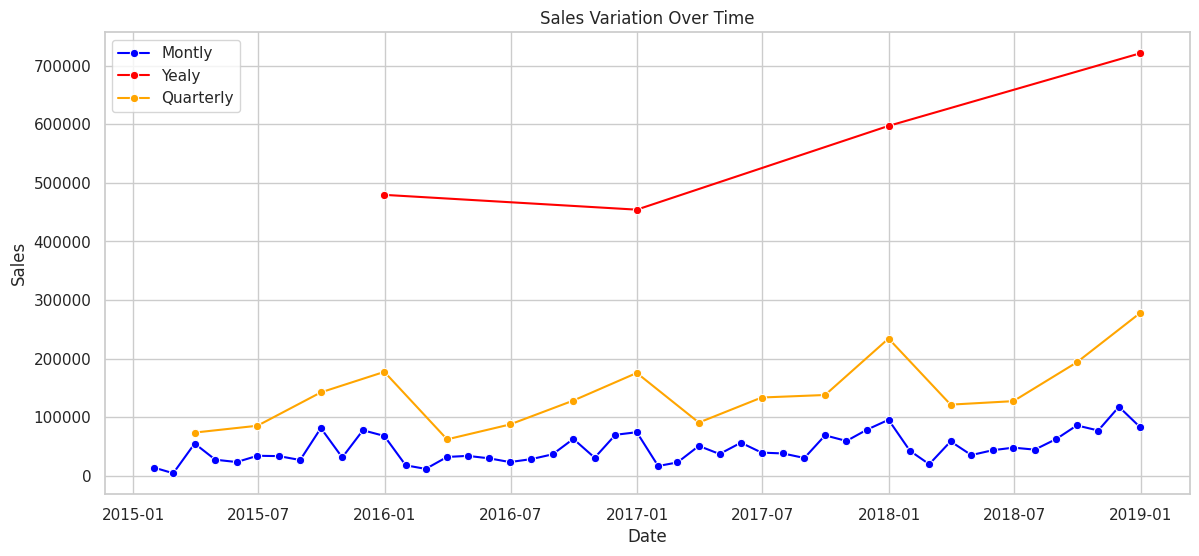

In [27]:
sales_time = data.loc[:,['order_date','sales']]      #selecting order_date and sales column
sales_time_m = date_sale.groupby(pd.Grouper(key='order_date', freq='m')).sum().reset_index()
sales_time_y = date_sale.groupby(pd.Grouper(key='order_date', freq='Y')).sum().reset_index()
sales_time_q = date_sale.groupby(pd.Grouper(key='order_date', freq='Q')).sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_time_m, x='order_date', y='sales', marker='o', color='blue', label='Montly')
sns.lineplot(data=sales_time_y, x='order_date', y='sales', marker='o', color='red', label='Yealy')
sns.lineplot(data=sales_time_q, x='order_date', y='sales', marker='o', color='orange', label='Quarterly')

plt.title('Sales Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.grid(True)
plt.legend()
plt.show()

### Region wise sales

In [28]:
data['region'].value_counts()

West       3140
East       2773
Central    2277
South      1598
Name: region, dtype: int64

<ipython-input-29-2fa2759d2041>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region',y='sales',data=data, hue='category', ci=None, palette='Set2')


<Axes: xlabel='region', ylabel='sales'>

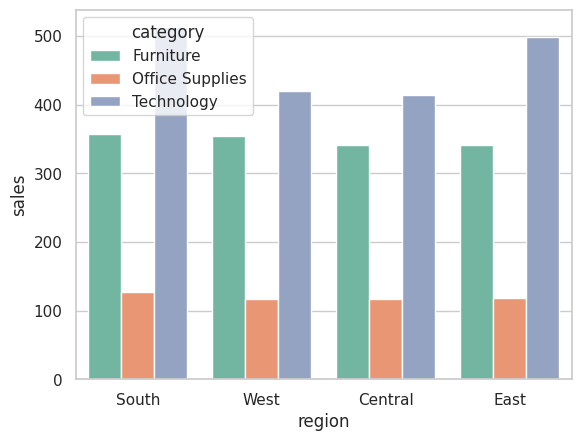

In [29]:
sns.barplot(x='region',y='sales',data=data, hue='category', ci=None, palette='Set2')

# Ship Mode

* **Which mode of shipping is mostly preffered by customers.**

<ipython-input-30-19d20681bd2f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ship_mode', data = data, palette='Set1')


<Axes: xlabel='ship_mode', ylabel='count'>

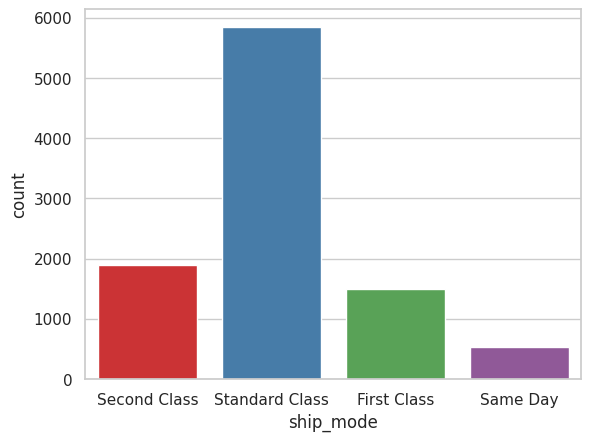

In [30]:
sns.countplot(x='ship_mode', data = data, palette='Set1')

**Observation:**

There are 4 types of shipping mode like Same Day, First Class, Second Class & Standard Class but most of the people Prefers **Standard class** Mode

# Cities who made maximum purchase

<ipython-input-31-a5f39c0cae4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='state',data=data,order=order, palette="Set2")


<Axes: xlabel='count', ylabel='state'>

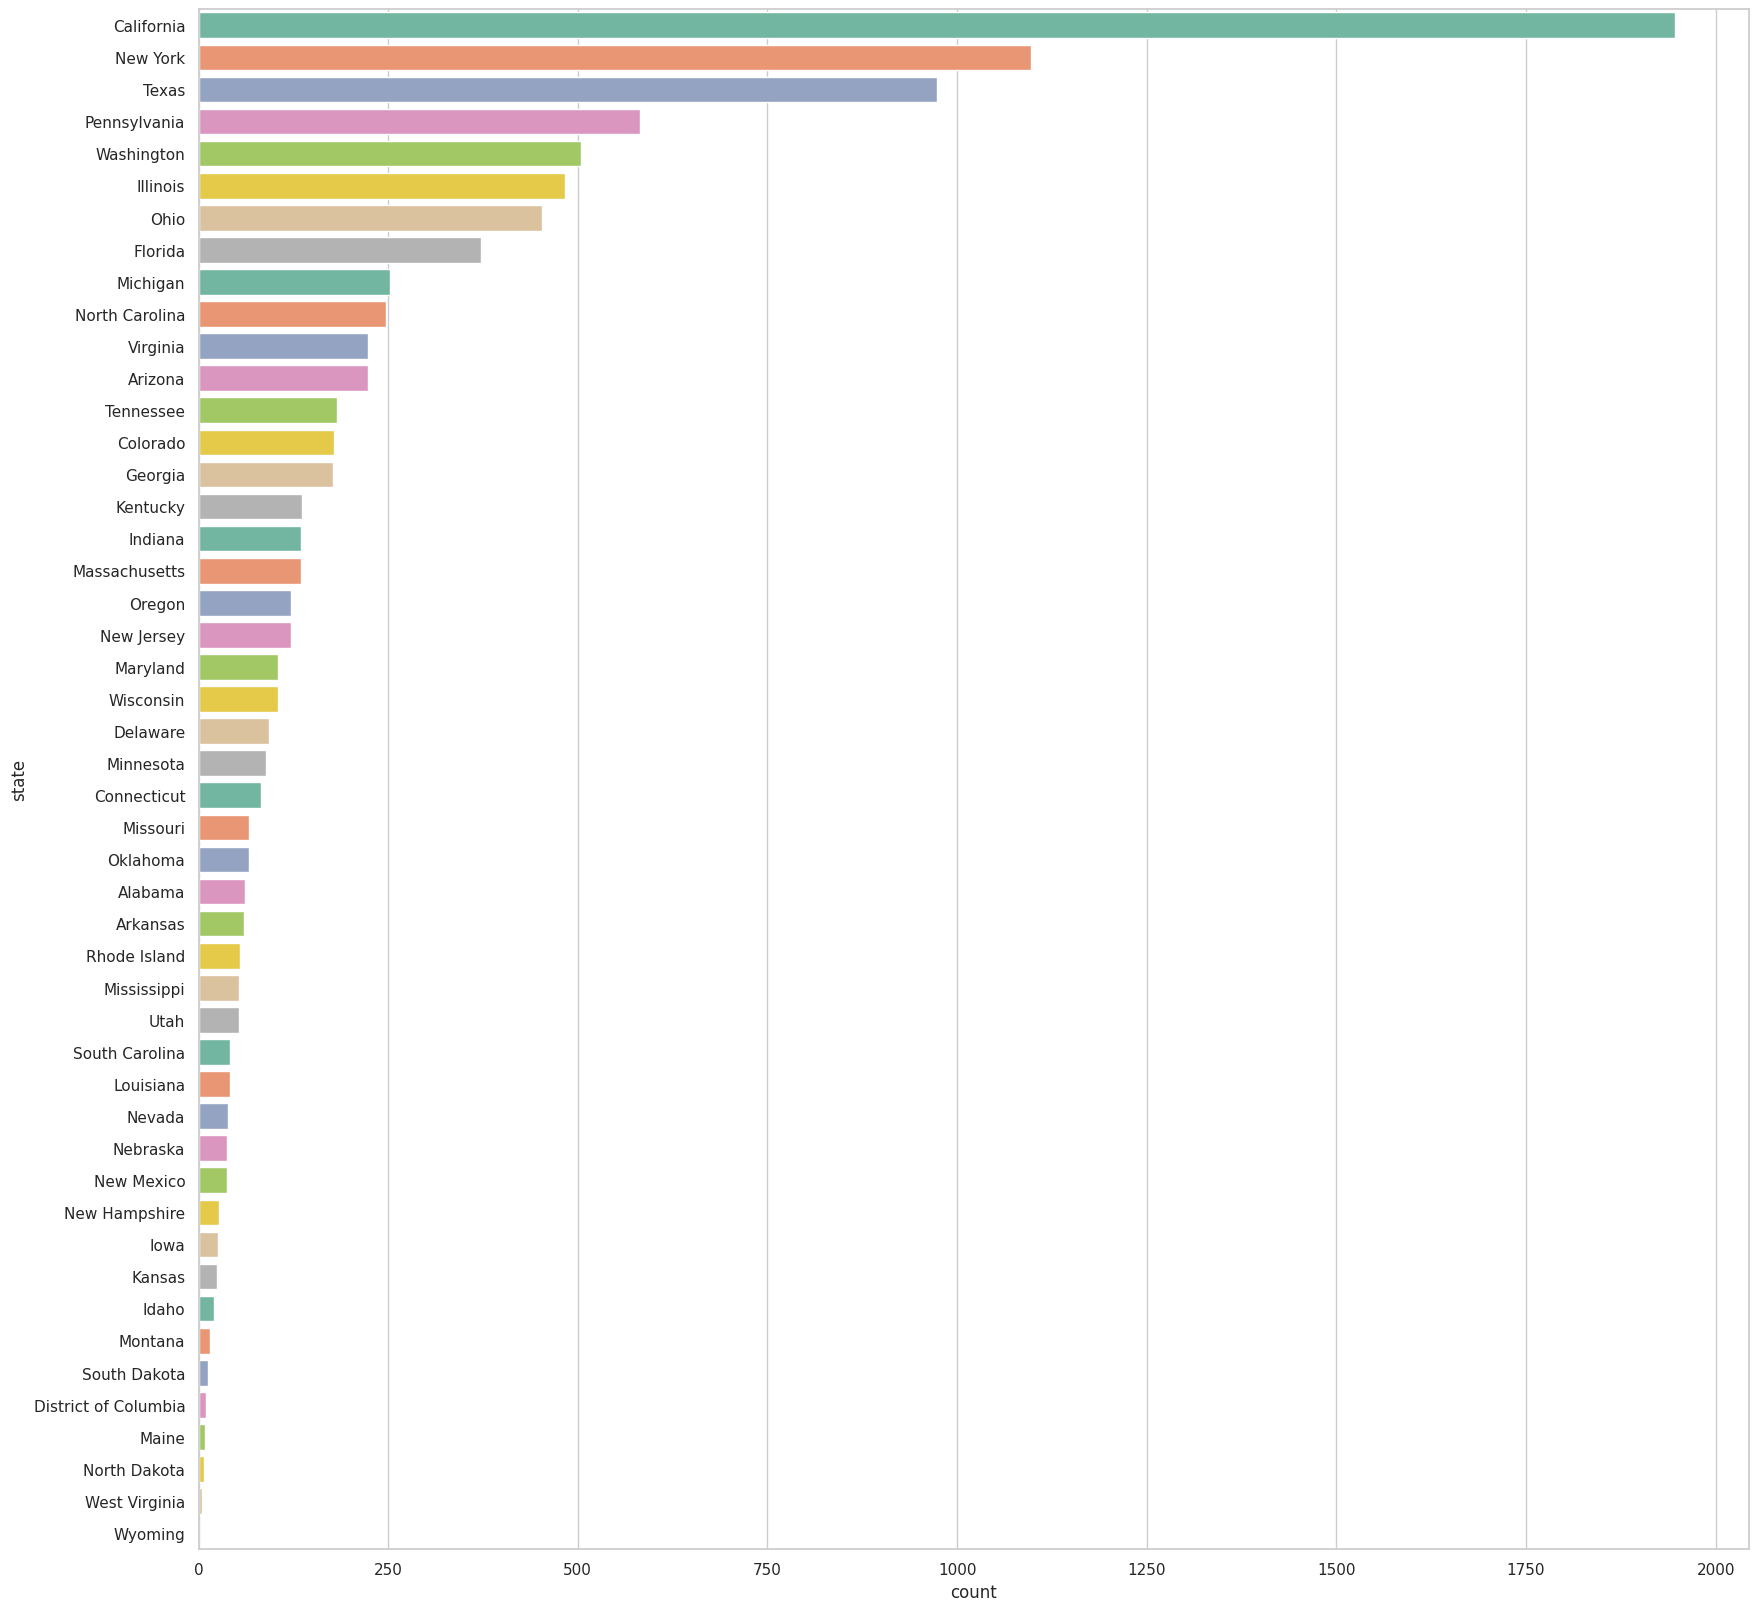

In [31]:
state_val_vount = data['state'].value_counts()
order = state_val_vount.index
plt.subplots(figsize=(20, 20))
sns.countplot(y='state',data=data,order=order, palette="Set2")

**Observation :**

From above chart we can say that **California**, **New York** & **Texas** has maximun sell and **North Dakota**, **West Virginia** & **Wyoming** has minimum least sell.

# Category

In [32]:
data['category'].value_counts()

Office Supplies    5903
Furniture          2075
Technology         1810
Name: category, dtype: int64

There are Three Product categories


*   Office Supplies
*   Furniture
*   Technology



### Box Plot of Category

<ipython-input-33-104adb6c39b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='sales', data=data, log_scale=True, palette="Set2")


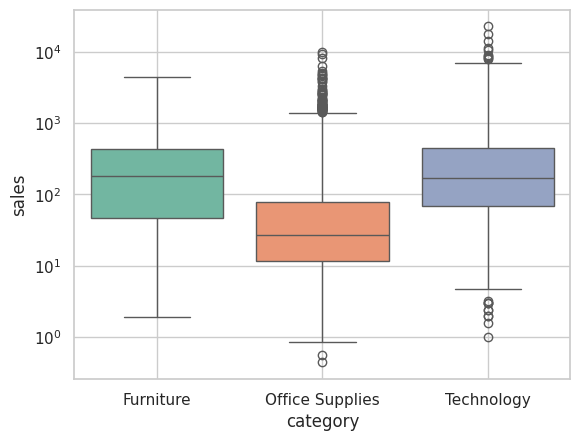

In [33]:
sns.boxplot(x='category', y='sales', data=data, log_scale=True, palette="Set2")
plt.grid(True)

### Pie Chart of Category

Text(0.5, 1.0, 'Total sales did by each category')

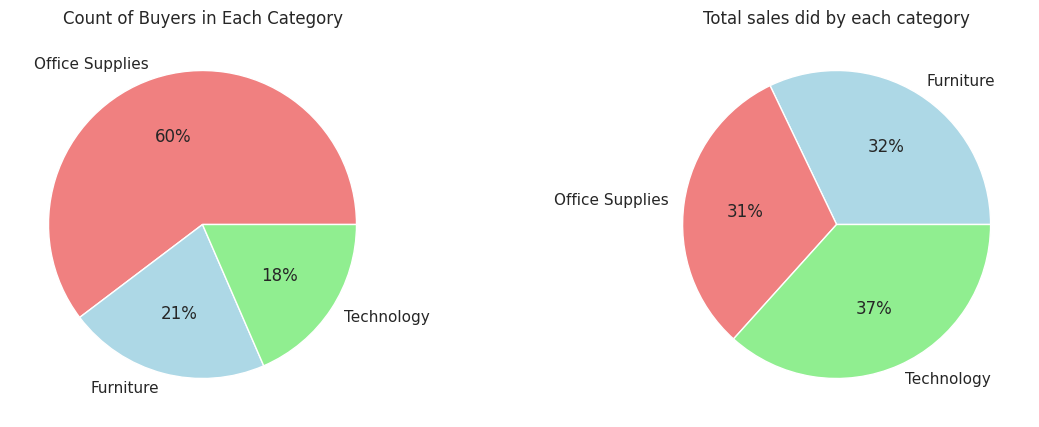

In [34]:
fig,axes=plt.subplots(ncols=2,nrows=1, figsize=(15,5))
x=data['category'].value_counts()
labels=x.index
colors1 = ['lightcoral', 'lightblue', 'lightgreen']
ax=axes[0].pie(x,labels=labels, autopct='%.0f%%',colors=colors1)
axes[0].set_title("Count of Buyers in Each Category")

cat_sale = data.loc[:,['category','sales']]
cat_sale_gr=cat_sale.groupby(pd.Grouper(key='category')).sum()
cat_sale_gr.reset_index(inplace=True)
labels=cat_sale_gr['category']
colors2 = ['lightblue','lightcoral', 'lightgreen']
ax=axes[1].pie( cat_sale_gr['sales'],labels=labels, autopct='%.0f%%',colors=colors2)
axes[1].set_title("Total sales did by each category")


**First pie chart:**


*   It shows that how many numbers of order take place of each category
*   Office Supplies : 60%
*   Furniture : 21%
*   Technology : 18%

**Second Pie Chart:**
*   It shows that many amount of sales did each category.
*   Office Supplies : 31%
*   Furniture : 32%
*   Technology : 37%

From above chart we can say that There is less number of order take place of **Technology category** but it gaves huge profit to store.


# Sub-Category

In [35]:
sub_category_counts = data['sub_category'].value_counts() # Sub-category of stores
sub_category_counts

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          605
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: sub_category, dtype: int64

<ipython-input-36-fb8b236f4f96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_category', data=data, order=order, palette='Set1')


Text(0.5, 1.0, 'Sub-Category')

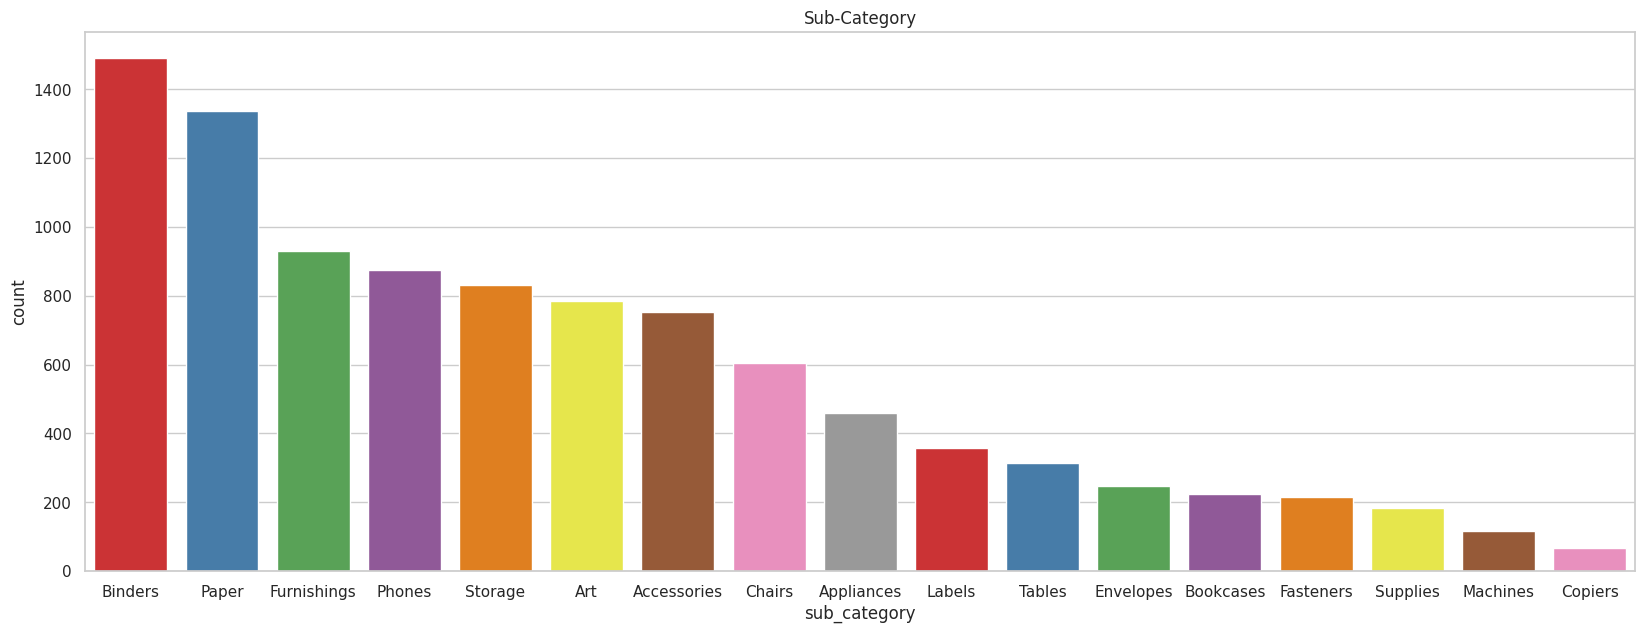

In [36]:
order = sub_category_counts.index
fig, axes = plt.subplots(figsize=(20, 7))
sns.countplot(x='sub_category', data=data, order=order, palette='Set1')
plt.title("Sub-Category")


**Top 3 Most selling sub-categories are:**


*   Blinders
*   paper
*   Furnishing

**Top 3 least selling sub-categories are:**

*   Supplies
*   Machines
*   Copiers


# Bivariate Analysis :

### Correlation With Sales

<ipython-input-37-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

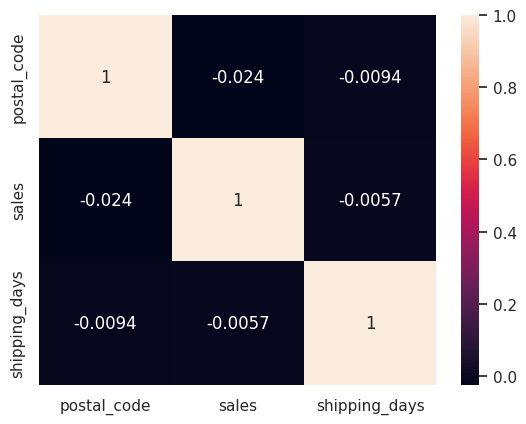

In [37]:
sns.heatmap(data.corr(),annot=True)

**Observation:**

Finding correlation between sales and shipping days

### Scatter Plot

Text(0, 0.5, 'Sales')

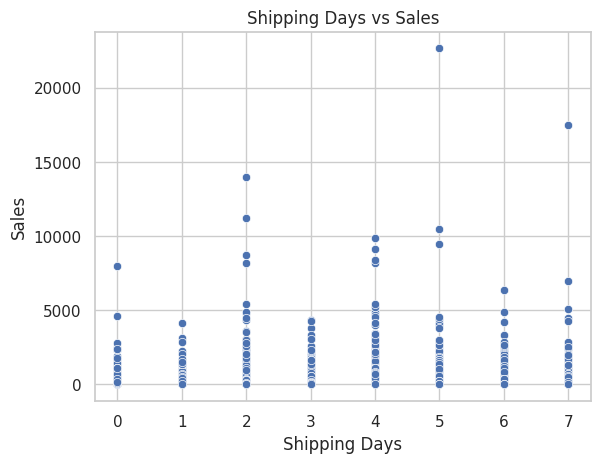

In [38]:
sns.scatterplot(data=data, x='shipping_days', y='sales')
plt.title("Shipping Days vs Sales")
plt.xlabel("Shipping Days")
plt.ylabel("Sales")

### Category-wise Sales Trends:

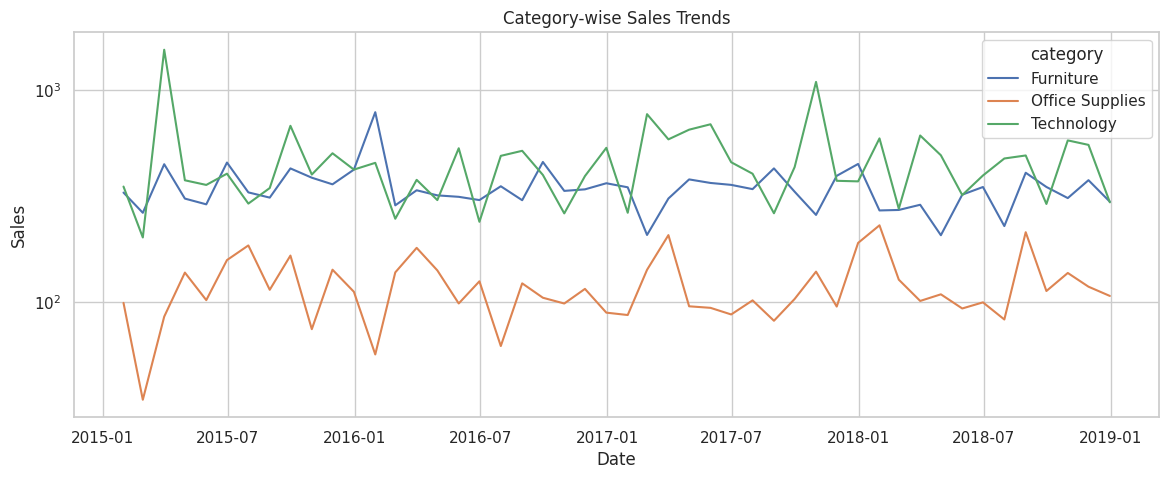

In [39]:
# stored required columns to cat_sale
cat_sale = data.loc[:,['order_date','category','sales']]
# ordate data is in daily format so i've grouped it in mothly format and take mean of sales
cat_sale_gr = cat_sale.groupby(['category',pd.Grouper(key='order_date',freq='M')])['sales'].mean().reset_index()


plt.figure(figsize=(14, 5))
sns.lineplot(x='order_date',y='sales',hue='category', data=cat_sale_gr)
plt.yscale('log')
plt.grid(True)
plt.title("Category-wise Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

**Observation:**

*   Graph clearly shows that Teachnology has little more sells than Furniture.
*   Office Supplies has very less sales.


### Sales by Region:

<ipython-input-40-14f283967275>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=reg_sale, palette='Set1')


Text(0.5, 1.0, 'Sales By Region')

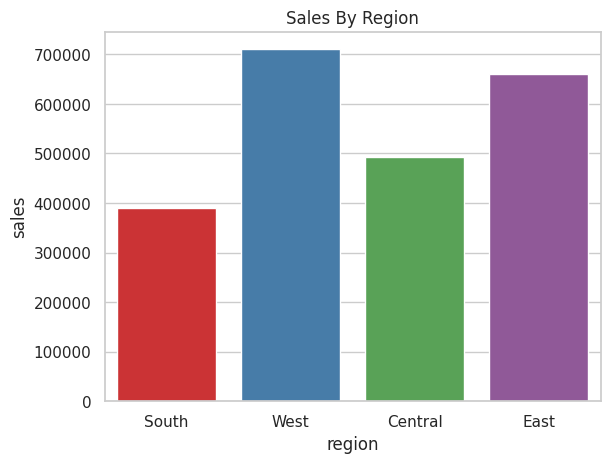

In [40]:
reg_sale = data.groupby(pd.Grouper(key='region'))['sales'].sum().reset_index()
sns.barplot(x='region', y='sales', data=reg_sale, palette='Set1')
plt.title("Sales By Region")

**Observation:**

**East** and **West** Region has more sales than other region.

## Customer Segment Analysis:
###    Line Chart

Text(0.5, 0, 'Date')

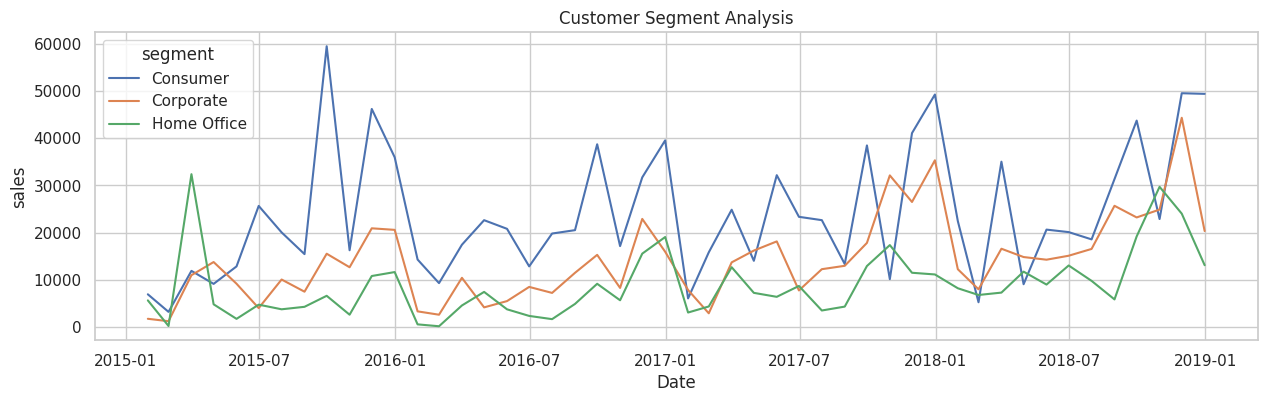

In [41]:
# Groupping segment order date and sales for linec chart
seg_sale = data.groupby(['segment',pd.Grouper(key='order_date', freq='M')])['sales'].sum().reset_index()

plt.figure(figsize=(15,4))
sns.lineplot(x='order_date', y='sales', data=seg_sale, hue='segment')
plt.title("Customer Segment Analysis")
plt.xlabel("Date")

**Observation :**

Using line chart we can see that from 2015 consumer ddoes high sales and Home office makes very less sales.

### Bar Chart

<ipython-input-42-a10b5b035d68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='sales',data=seg_sale,palette='Set2')


Text(0.5, 1.0, 'Customer segement Analysis')

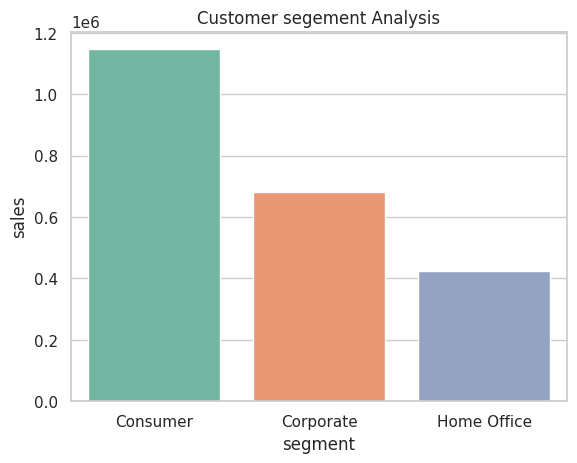

In [42]:
seg_sale = data.groupby(pd.Grouper(key='segment'))['sales'].sum().reset_index()
sns.barplot(x='segment', y='sales',data=seg_sale,palette='Set2')
plt.title("Customer segement Analysis")

**Observation :**


*   In bar chart we can easily see that consumer makes higher sales than other segments.




# Sales vs Quantity :

### Scattter Plot

In [43]:
pro_sales = data.groupby('product_name')['sales'].agg(['sum', 'count']).reset_index()
pro_sales.columns = ['product_name', 'average_sales', 'product_count']

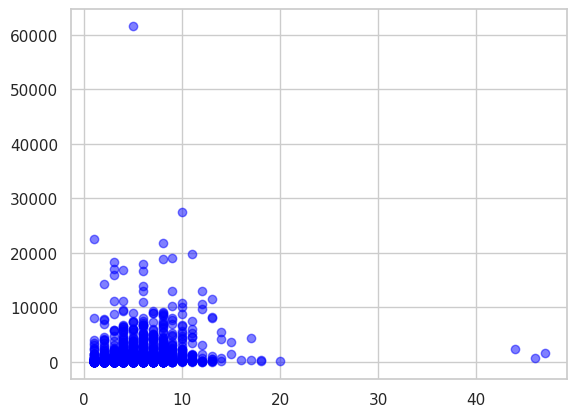

In [44]:
plt.scatter(pro_sales['product_count'], pro_sales['average_sales'], color='blue', alpha=0.5)

### Count Plot

<ipython-input-45-ab4f19040d33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_name', data=data[data['product_name'].isin(top_8_products)], order=top_8_products, palette='Set3', width=0.3)


<Axes: xlabel='product_name', ylabel='count'>

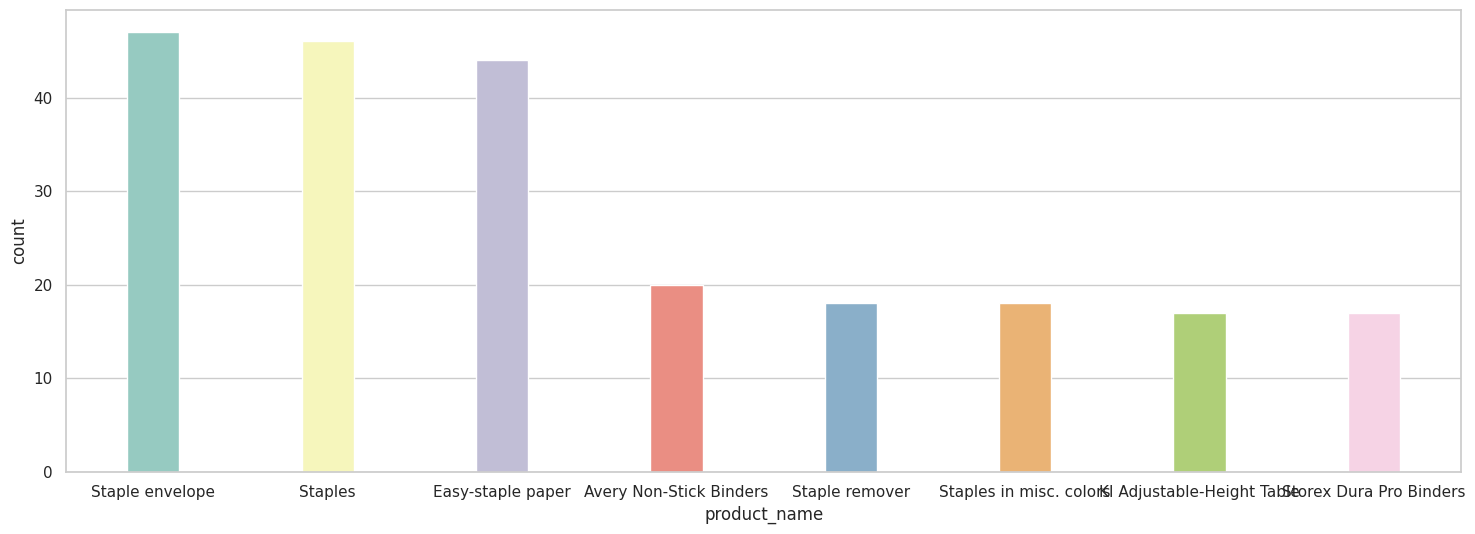

In [45]:
top_8_products = data['product_name'].value_counts().nlargest(8).index
plt.figure(figsize=(18, 6))
sns.countplot(x='product_name', data=data[data['product_name'].isin(top_8_products)], order=top_8_products, palette='Set3', width=0.3)


### Consumer Segment vs Quantity

<ipython-input-46-e0f0c4c25160>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='count', data=seg_sales, palette='viridis',ax=axes[0])


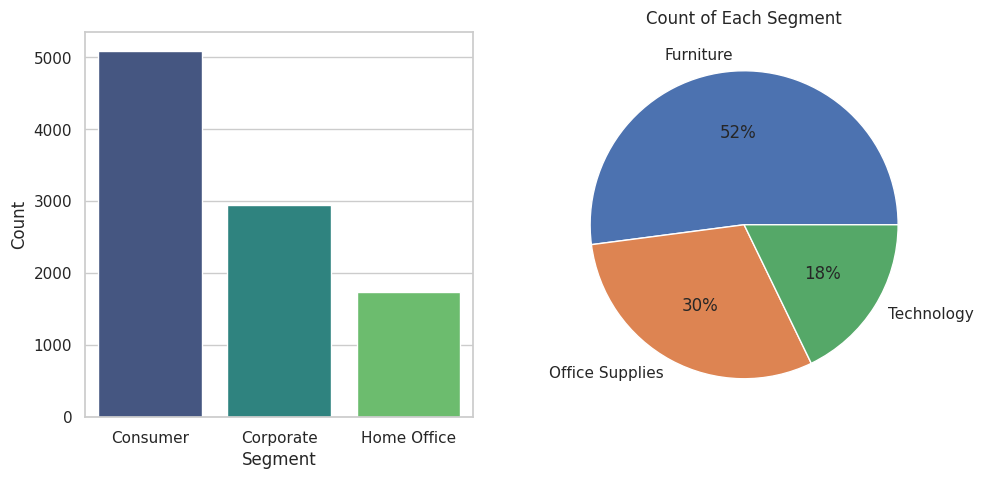

In [46]:
seg_sales = data['segment'].value_counts().reset_index()
seg_sales.columns = ['segment', 'count']

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(11,5))
sns.barplot(x='segment', y='count', data=seg_sales, palette='viridis',ax=axes[0])
plt.title('Count of Each Segment')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Count')

ax = axes[1].pie(seg_sales['count'], labels=labels,autopct='%.0f%%')



**Observation :**


*   Consumer has more sales that other two segments




# Shipping Mode vs. Sales

<ipython-input-47-44326b1e86f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ship_mode', y='sales', data=mode_sales,palette='Set2')


Text(0.5, 1.0, 'Shipping Mode vs. Sales')

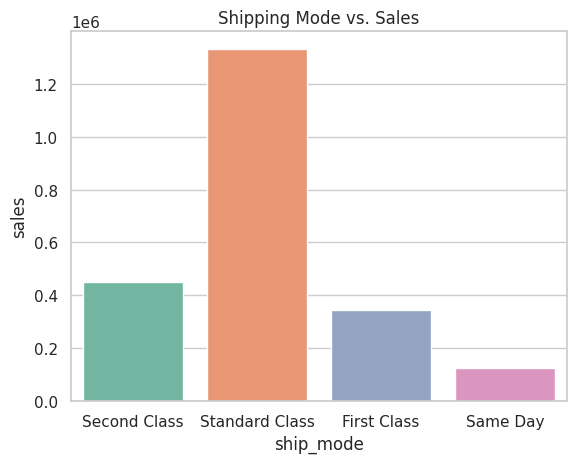

In [47]:
mode_sales = data.groupby(pd.Grouper(key='ship_mode'))['sales'].sum().reset_index()

sns.barplot(x='ship_mode', y='sales', data=mode_sales,palette='Set2')
plt.title("Shipping Mode vs. Sales")

**Observation:**
* Most of the people prefers standard class.

#  Product-wise Sales Analysis

<ipython-input-48-047fa52024e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales',y='product_name', data=top_products,palette='Set3')


<Axes: xlabel='sales', ylabel='product_name'>

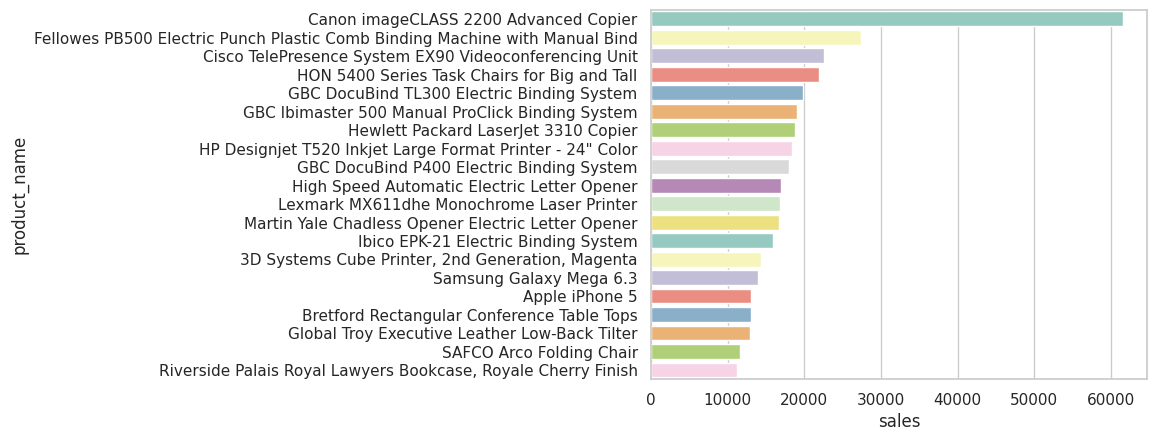

In [48]:
top_products = data.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(20).reset_index()
sns.barplot(x='sales',y='product_name', data=top_products,palette='Set3')

# Sub-Category wise Sales Analysis

<ipython-input-49-5dc47ec7c597>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales',y='sub_category', data=top_products,palette='Set3')


<Axes: xlabel='sales', ylabel='sub_category'>

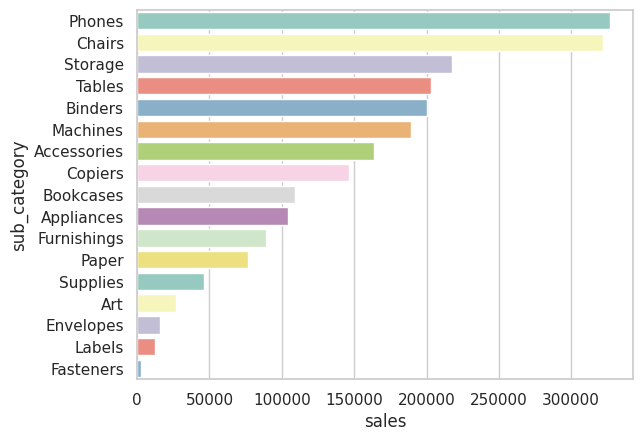

In [49]:
top_products = data.groupby('sub_category')['sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='sales',y='sub_category', data=top_products,palette='Set3')

# Region-wise Product Sales:

<ipython-input-50-931d900e364d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=reg_sale, palette='Set2')


<Axes: xlabel='region', ylabel='sales'>

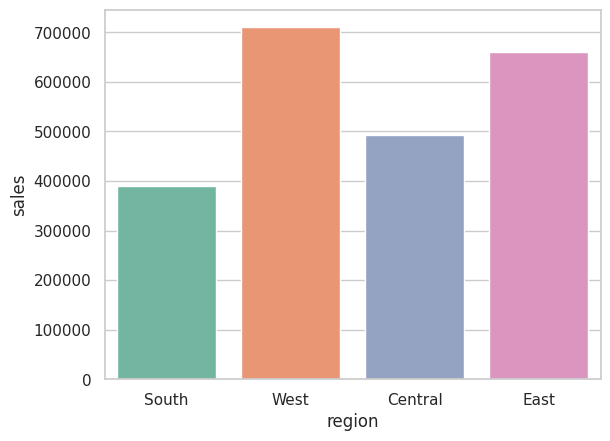

In [50]:
sns.barplot(x='region', y='sales', data=reg_sale, palette='Set2')

**Observation:**
* West and East region has more sells than other region